# Quantum Fourier Transform

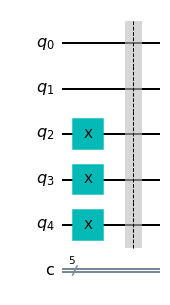

In [268]:
import numpy as np
from qiskit import QuantumCircuit, execute
from qiskit.visualization import plot_histogram

# create quantum circtuit
circuit = QuantumCircuit(5, 5)

# start with a binary string 00111
circuit.x([2, 3, 4])

circuit.barrier()

%matplotlib inline
circuit.draw(output = 'mpl')

In [269]:
# define function for qft and invese qft
def qft(circuit, qubit_start, qubit_end) :
    # apply hadamard gate
    circuit.h(qubit_start)

    phase = 1

    for qubit in range(qubit_start + 1, qubit_end + 1) :
        # apply controlled phase rotation gate
        # circuit.cp(np.pi / 2**(qubit), qubit, qubit_start, label = 'R')
        circuit.cp(np.pi / 2**(phase), qubit_start, qubit, label = 'R')
        phase += 1


    qubit_start += 1

    # after applying rotations to n qubit, contine with the next qubit
    if qubit_start < qubit_end :
        # circuit.barrier()
        qft(circuit, qubit_start, qubit_end)
    else :
        circuit.h(qubit_start)

def swap_qubits(circuit, num_qubits) :
    for qubit in range(num_qubits // 2):
        circuit.swap(qubit, num_qubits - qubit - 1)

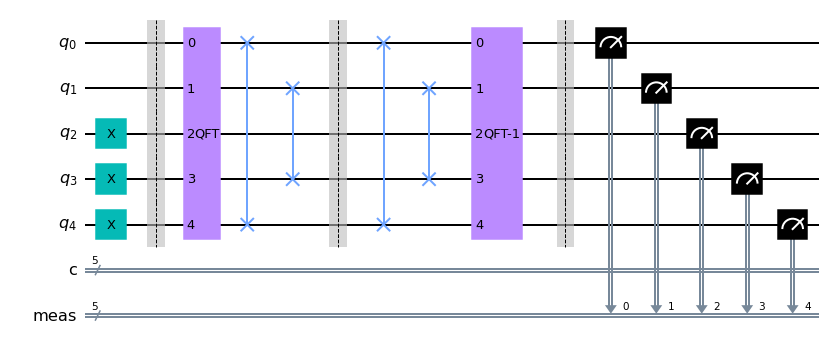

In [270]:
from qiskit.circuit.library import QFT

# apply qft 
qft_circ = QuantumCircuit(5)
qft(qft_circ, 0, 4)
circuit.compose(qft_circ.to_gate(label = 'QFT'), inplace = True)
swap_qubits(circuit, 5)

circuit.barrier()

swap_qubits(circuit, 5)

# apply inverse qft to see if resetting is correct
inverse_circ = qft_circ.inverse()

circuit.compose(inverse_circ.to_gate(label = 'QFT-1'), inplace = True)

circuit.measure_all()

%matplotlib inline
circuit.draw(output = 'mpl')

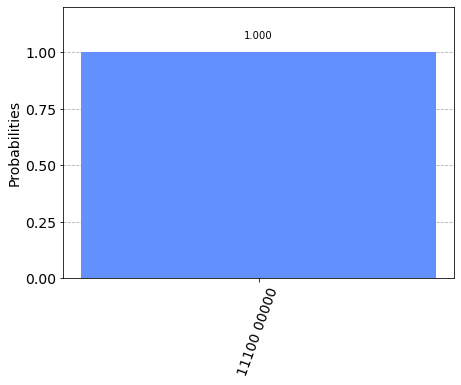

In [271]:
# simulate the circuit
from qiskit import Aer

simulator = simulator = Aer.get_backend('qasm_simulator')

result = execute(circuit, backend = simulator, shots = 1000).result()

counts = result.get_counts()

plot_histogram(counts)